In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Import Dataset


In [7]:

#  Load data set
df  = pd.read_csv('/content/drive/MyDrive/minihomeprices.csv')


# show first five rows
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
# show information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [9]:
# Descriptiion of our data set

df.describe().style.background_gradient(cmap='CMRmap')


,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


# 2. Data Analysis

In [10]:
#  to know how many null values

df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

* we can see here only bedrooms has null values

In [11]:
# fill null values with median value

df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )

#  here we can use inplace=True as well.  both are valid for update data frame

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


# 3. Data Visualization

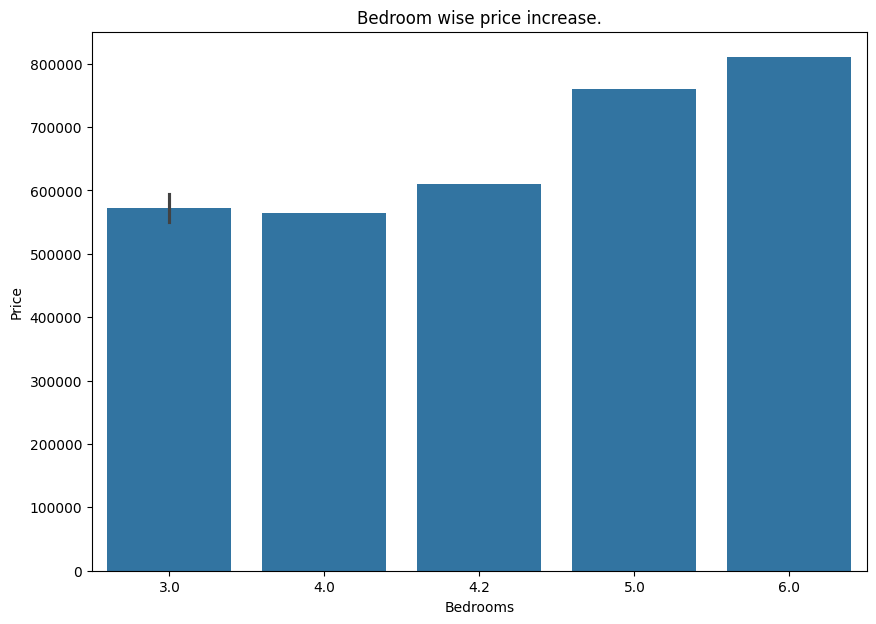

In [13]:
import seaborn as sns  # Make sure seaborn is imported
import matplotlib.pyplot as plt

# barploat show

plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot(x='bedrooms', y='price', data=df)  # Use x and y keywords for clarity
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

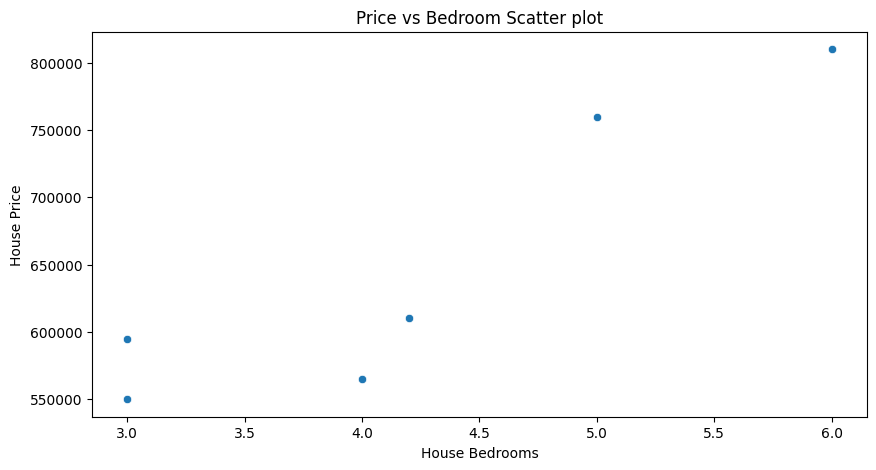

In [16]:
# Scatter plot
plt.figure(figsize=(10, 5))

sns.scatterplot(x='bedrooms', y='price', data=df)  # Pass 'bedrooms' and 'price' as keyword arguments
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

* Here we can see bedrooms and price linearly related, House's Price increased if bedroom size will increase.

<Figure size 1000x700 with 0 Axes>

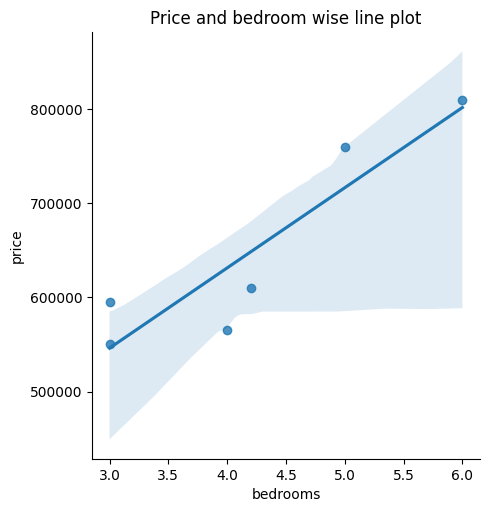

In [17]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

# 4. Model Implementing

In [18]:
# import model
from sklearn.linear_model import LinearRegression

* Now, Create model instance from LinearRegression class

In [ ]:
mdl = LinearRegression()

* Before fitting the model, create X and y for model fitting

In [ ]:
#  Set dependent and independent variables

X = df.drop(['price'], axis=1)
y = df['price']

In [19]:
# Change bedrooms data type flaot to int

df['bedrooms'] = df['bedrooms'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame (make sure it's loaded)

#  Set dependent and independent variables
X = df.drop(['price'], axis=1)
y = df['price']

# Now you can print them
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600         3   20
1  3000         4   15
2  3200         4   18
3  3600         3   30
4  4000         5    8
5  4100         6    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


* Now, We are going to fitting the training and testing data

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame (make sure it's loaded)

#  Set dependent and independent variables
X = df.drop(['price'], axis=1)
y = df['price']

# Create a LinearRegression model instance
mdl = LinearRegression()  # Assign the model to 'mdl'

# Now you can fit the model
mdl.fit(X, y)

LinearRegression()

# Prediction


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame (make sure it's loaded)

#  Set dependent and independent variables
X = df.drop(['price'], axis=1)
y = df['price']

# Create a LinearRegression model instance
mdl = LinearRegression()  # Assign the model to 'mdl'
mdl.fit(X, y) # Fit the model to your data

# Now custimize prediction testing
prediction = mdl.predict([[ 4000, 2, 50 ]]) # Make prediction and store it
print(prediction) # Print the prediction

[554764.63435817]


- Show Coeficient

In [26]:
mdl.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

- Show intecept

In [27]:
mdl.intercept_

221323.00186540396

In [28]:
#  know score
score = mdl.score( X, y )

print(score * 100)

95.50196399325819


In [31]:
from google.colab import drive
drive.mount('/content/drive')

# Example: saving to Google Drive
!cp house-price-prediction-multiple-linear-regression/content/drive/My\ Drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: missing destination file operand after 'house-price-prediction-multiple-linear-regression/content/drive/My Drive/'
Try 'cp --help' for more information.


---
---

<div class="text-center">
    <h1>That's it Guys,</h1>
    <h1>🙏</h1>
    
        
        I Hope you guys you like and enjoy it, and learn something interesting things from this notebook,
        
        Even I learn a lots of things while I'm creating this notebook
    
        Keep Learning,
        Regards,
        Vikas Ukani.
    
</div>

---
---

<img src="https://static.wixstatic.com/media/3592ed_5453a1ea302b4c4588413007ac4fcb93~mv2.gif" align="center" alt="Thank You" style="min-height:20%; max-height:20%" width="90%" />

